### **Interacting with Web APIs**
**Problem Statement**: Analyzing Weather Data from OpenWeatherMap API

**Dataset**: Weather data retrieved from OpenWeatherMap API

**Description**: The goal is to interact with the OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.

**Tasks to Perform**:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.


## ------------------------------------------------------------------------------------------------------------

### **Importing Libraries**

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## ------------------------------------------------------------------------------------------------------------

### **Task 1 & 2**

In [ ]:
# Step 1: Set up API details (replace 'your_api_key' with your actual API key)
api_key = '601585a696e04c3219ac52bc135381ed'
city = 'New York'  # You can change this to any other city
api_url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric'

In [ ]:
# Step 2: Make API request to get weather data
response = requests.get(api_url)
weather_data = response.json()

## ------------------------------------------------------------------------------------------------------------

### **Task 3**

In [ ]:
# Step 3: Check if the response contains valid data
if 'list' not in weather_data:
    print("Error in fetching data. Please check your API key or city name.")
else:
    # Step 4: Extract relevant attributes from API response
    forecast_list = weather_data['list']
    data = []
    for forecast in forecast_list:
        date_time = datetime.datetime.fromtimestamp(forecast['dt'])
        temp = forecast['main']['temp']
        humidity = forecast['main']['humidity']
        wind_speed = forecast['wind']['speed']
        description = forecast['weather'][0]['description']

        data.append([date_time, temp, humidity, wind_speed, description])

    # Create a DataFrame from the extracted data
    df = pd.DataFrame(data, columns=['DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'Description'])

In [ ]:
df

,DateTime,Temperature,Humidity,Wind Speed,Description
0,2024-10-04 14:30:00,14.42,89,1.82,few clouds
1,2024-10-04 17:30:00,15.36,86,1.73,scattered clouds
2,2024-10-04 20:30:00,18.25,73,2.61,broken clouds
3,2024-10-04 23:30:00,22.01,58,3.69,overcast clouds
4,2024-10-05 02:30:00,21.00,60,4.46,overcast clouds
5,2024-10-05 05:30:00,20.07,70,4.30,overcast clouds
6,2024-10-05 08:30:00,19.71,74,3.02,broken clouds
7,2024-10-05 11:30:00,19.45,73,2.21,broken clouds
8,2024-10-05 14:30:00,18.56,77,2.22,clear sky
9,2024-10-05 17:30:00,18.53,77,3.04,clear sky


## ------------------------------------------------------------------------------------------------------------

### **Task 4 & 5**

Daily Weather Statistics:
         Date  Avg Temp (°C)  Max Temp (°C)  Min Temp (°C)  Avg Humidity (%)  \
0  2024-10-04       17.51000          22.01          14.42            76.500   
1  2024-10-05       20.56875          24.74          18.53            65.250   
2  2024-10-06       20.34250          24.75          17.10            53.125   
3  2024-10-07       19.40000          22.23          18.06            74.750   
4  2024-10-08       16.78875          21.49          13.46            43.750   
5  2024-10-09       16.29750          19.57          13.32            36.250   

   Avg Wind Speed (m/s)  
0               2.46250  
1               3.28500  
2               3.52125  
3               4.75000  
4               4.45500  
5               4.26000  


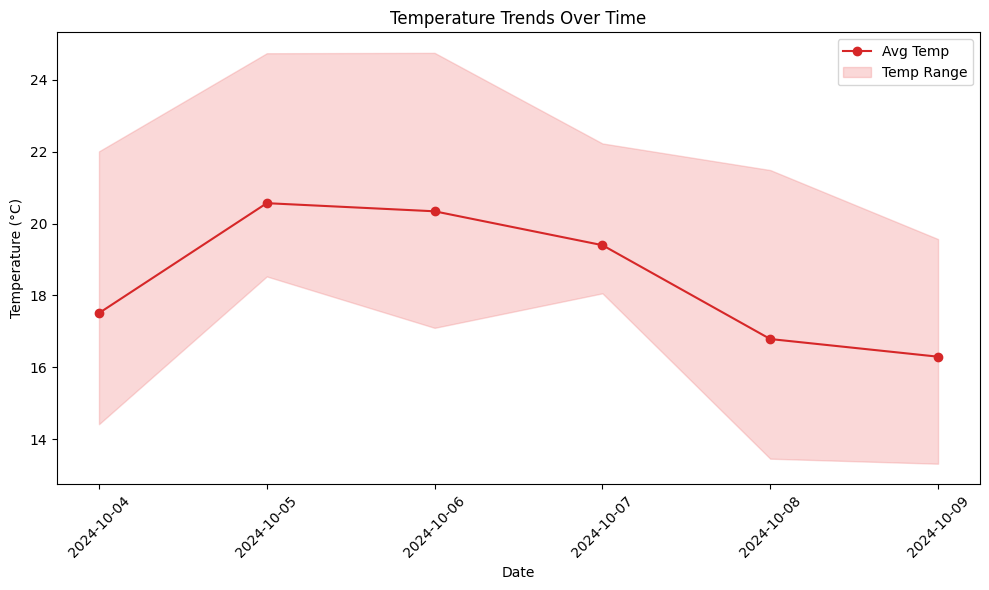

In [ ]:
# Group data by date for daily analysis
df['Date'] = df['DateTime'].dt.date

# Calculate daily statistics
daily_stats = df.groupby('Date').agg({
    'Temperature': ['mean', 'max', 'min'],
    'Humidity': 'mean',
    'Wind Speed': 'mean'
}).reset_index()

# Rename columns for clarity
daily_stats.columns = ['Date', 'Avg Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)', 'Avg Humidity (%)', 'Avg Wind Speed (m/s)']

# Display daily statistics
print("Daily Weather Statistics:")
print(daily_stats)

# Identify trends over time (e.g., average temperature trend)
plt.figure(figsize=(10, 6))
plt.plot(daily_stats['Date'], daily_stats['Avg Temp (°C)'], marker='o', linestyle='-', color='tab:red', label='Avg Temp')
plt.fill_between(daily_stats['Date'], daily_stats['Min Temp (°C)'], daily_stats['Max Temp (°C)'], color='lightcoral', alpha=0.3, label='Temp Range')
plt.title("Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## ------------------------------------------------------------------------------------------------------------

### **Task 6**

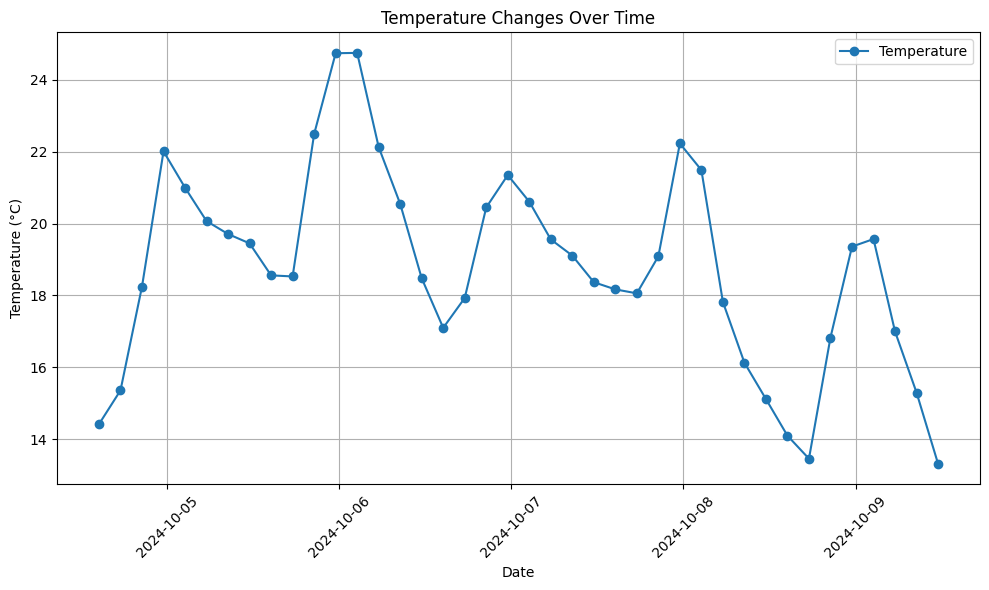

In [ ]:
# Step 6: Visualize the weather data

# Line chart for temperature changes
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['Temperature'], marker='o', linestyle='-', color='tab:blue', label='Temperature')
plt.title("Temperature Changes Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

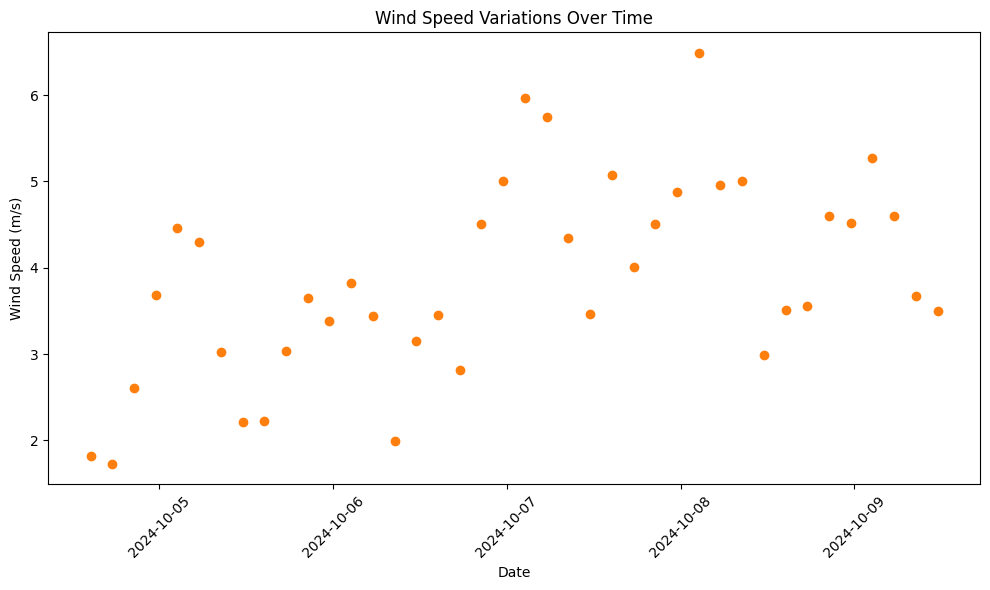

In [ ]:
# Scatter plot for wind speed variations
plt.figure(figsize=(10, 6))
plt.scatter(df['DateTime'], df['Wind Speed'], color='tab:orange')
plt.title("Wind Speed Variations Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

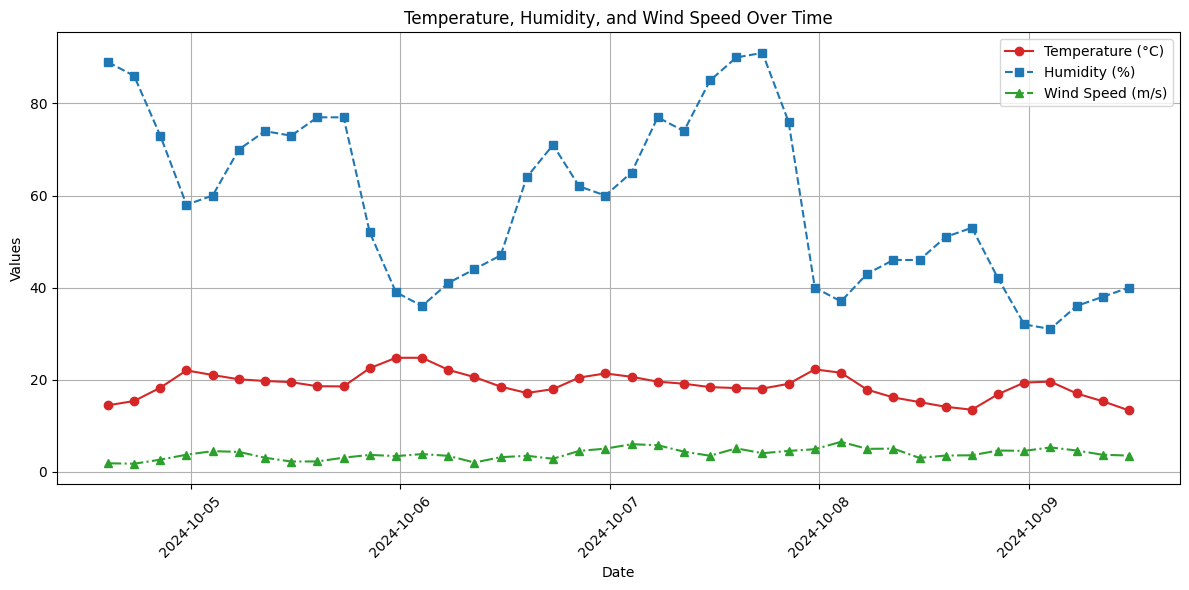

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Temperature'], marker='o', linestyle='-', color='tab:red', label='Temperature (°C)')
plt.plot(df['DateTime'], df['Humidity'], marker='s', linestyle='--', color='tab:blue', label='Humidity (%)')
plt.plot(df['DateTime'], df['Wind Speed'], marker='^', linestyle='-.', color='tab:green', label='Wind Speed (m/s)')
plt.title("Temperature, Humidity, and Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ------------------------------------------------------------------------------------------------------------

### **Task 7**

In [ ]:
# Step 7: Data Aggregation: Summarize data by date (daily summary)

# Daily aggregation
daily_summary = df.resample('D', on='DateTime').agg({
    'Temperature': 'mean',           # Average temperature
    'Humidity': 'mean',          # Total precipitation
    'Wind Speed': 'mean'             # Average wind speed
}).reset_index()

print("Daily summary : \n",daily_summary)

# Monthly aggregation
monthly_summary = df.resample('M', on='DateTime').agg({
    'Temperature': 'mean',           # Average temperature
    'Humidity': 'mean',          # Total precipitation
    'Wind Speed': 'mean'             # Average wind speed
}).reset_index()

print("\n\nMonthly summary : \n",monthly_summary)

# Function to categorize seasons
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a 'Season' column to the DataFrame
df['Season'] = df['DateTime'].apply(get_season)

# Seasonal aggregation
seasonal_summary = df.groupby('Season').agg({
    'Temperature': 'mean',           # Average temperature
    'Humidity': 'mean',          # Total precipitation
    'Wind Speed': 'mean'             # Average wind speed
}).reset_index()

print("\n\nSeasonal summary : \n",seasonal_summary)


Daily summary : 
     DateTime  Temperature  Humidity  Wind Speed
0 2024-10-04     17.51000    76.500     2.46250
1 2024-10-05     20.56875    65.250     3.28500
2 2024-10-06     20.34250    53.125     3.52125
3 2024-10-07     19.40000    74.750     4.75000
4 2024-10-08     16.78875    43.750     4.45500
5 2024-10-09     16.29750    36.250     4.26000


Monthly summary : 
     DateTime  Temperature  Humidity  Wind Speed
0 2024-10-31     18.80075     58.65      3.8745


Seasonal summary : 
   Season  Temperature  Humidity  Wind Speed
0   Fall     18.80075     58.65      3.8745


## ------------------------------------------------------------------------------------------------------------

### **Task 8**

In [ ]:
import folium
import pandas as pd

# Example data
data = {
    'Location': ['New York', 'Los Angeles', 'Chicago'],
    'Latitude': [40.7128, 34.0522, 41.8781],
    'Longitude': [-74.0060, -118.2437, -87.6298],
    'Temperature': [15, 20, 12],
    'Wind Speed': [5, 3, 4],
    'Precipitation': [1, 0, 2]
}

sample_df = pd.DataFrame(data)

# Create a folium map centered at the mean location
m = folium.Map(location=[sample_df['Latitude'].mean(), sample_df['Longitude'].mean()], zoom_start=4)

# Add markers for each location
for index, row in sample_df.iterrows():
    popup_text = f"Location: {row['Location']}<br>Temperature: {row['Temperature']}°C<br>Wind Speed: {row['Wind Speed']} m/s<br>Precipitation: {row['Precipitation']} mm"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map
m.save('weather_map.html')

# To display map directly in Jupyter Notebook
m


## ------------------------------------------------------------------------------------------------------------

### **Task 9**

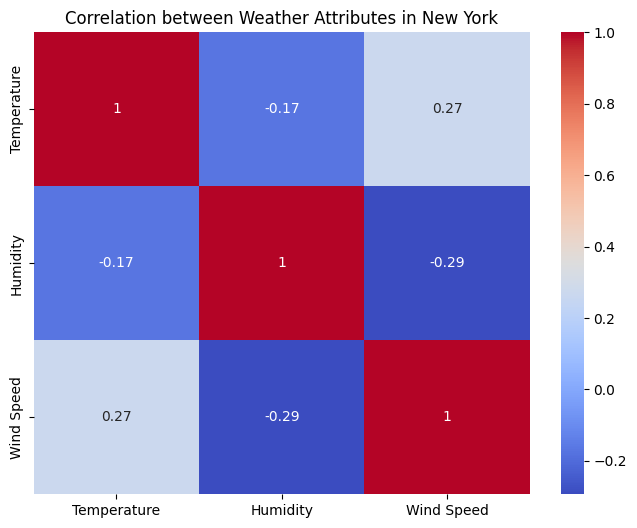

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Temperature', 'Humidity', 'Wind Speed']].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation between Weather Attributes in {city}")
plt.show()

## ------------------------------------------------------------------------------------------------------------